In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import folium

plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
warnings.filterwarnings('ignore')

df = pd.read_csv('hokuriku_convenience_store.csv')

In [2]:
df['店の種類'] = df['店名'].apply(lambda x: x.split('／')[0] if '／' in x else x)
df['店の種類'] = df['店の種類'].replace({'セブン‐イレブン': 'セブンイレブン', 'セブン・イレブン': 'セブンイレブン'})
df['店の種類'] = df['店の種類'].apply(lambda x: 'ファミリーマート' if 'ファミリーマート' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'ローソン' if 'ローソン' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'セブンイレブン' if 'セブン‐イレブン' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'セブンイレブン' if 'セブンイレブン' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'セブンイレブン' if 'セブン・イレブン' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'ミニストップ' if 'ミニストップ' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x:'ヤマザキ' if 'ヤマザキ' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'Yショップ' if 'Ｙショップ' in x else x)
df['店の種類'] = df['店の種類'].apply(lambda x: 'オレンジＢＯＸ' if 'オレンジ' in x else x)

In [3]:
pd.DataFrame(df['店の種類'].value_counts())

,店の種類
ファミリーマート,767
セブンイレブン,747
ローソン,493
ヤマザキ,57
Yショップ,17
オレンジＢＯＸ,7
オレボステーション,6
ミニストップ,6
有限会社スーパーあらい,2
みずはた酒店,2


In [4]:
df.loc[df['場所'].str.contains('石川'), '県'] = '石川'
df.loc[df['場所'].str.contains('富山'), '県'] = '富山'
df.loc[df['場所'].str.contains('福井'), '県'] = '福井'
df.loc[df['場所'].str.contains('長野'), '県'] = '長野'
df['カウント'] = 1
df[['県', '店の種類', 'カウント']].groupby(['県', '店の種類']).sum().reset_index().sort_values('カウント', ascending=False).head(20)

,県,店の種類,カウント
50,長野,セブンイレブン,450
52,長野,ファミリーマート,256
24,石川,ファミリーマート,230
10,富山,ローソン,161
59,長野,ローソン,147
4,富山,ファミリーマート,141
38,福井,ファミリーマート,140
3,富山,セブンイレブン,127
22,石川,セブンイレブン,110
41,福井,ローソン,95


([<matplotlib.patches.Wedge at 0x7fe36022fe20>,
 [Text(-0.9869716560673191, 0.48568194337419407, 'ファミリーマート'),
  Text(0.18594332433517455, -1.0841702265489421, 'セブンイレブン'),
  Text(1.0134958628255866, 0.4275817302404536, 'ローソン'),
  Text(0.36201490341157283, 1.0387228743548058, 'その他'),
  Text(0.1448983010712944, 1.0904148212247726, 'ヤマザキ'),
  Text(0.02714522961815576, 1.0996650110415342, 'Yショップ')],
 [Text(-0.5383481760367195, 0.2649174236586513, '35.4%'),
  Text(0.10142363145554974, -0.5913655781176047, '34.5%'),
  Text(0.5528159251775926, 0.23322639831297465, '22.8%'),
  Text(0.1974626745881306, 0.5665761132844395, '3.8%'),
  Text(0.07903543694797875, 0.5947717206680577, '2.6%'),
  Text(0.014806488882630413, 0.5998172787499277, '0.8%')])

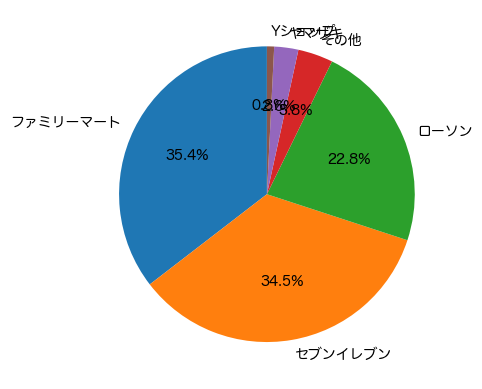

In [5]:
df['店の種類'] = df['店の種類'].apply(lambda x: 'その他' if x not in ['ファミリーマート', 'セブンイレブン', 'ローソン', 'ヤマザキ', 'Yショップ'] else x)
plt.pie(df['店の種類'].value_counts(), labels=df['店の種類'].value_counts().index, startangle=90, autopct='%1.1f%%')

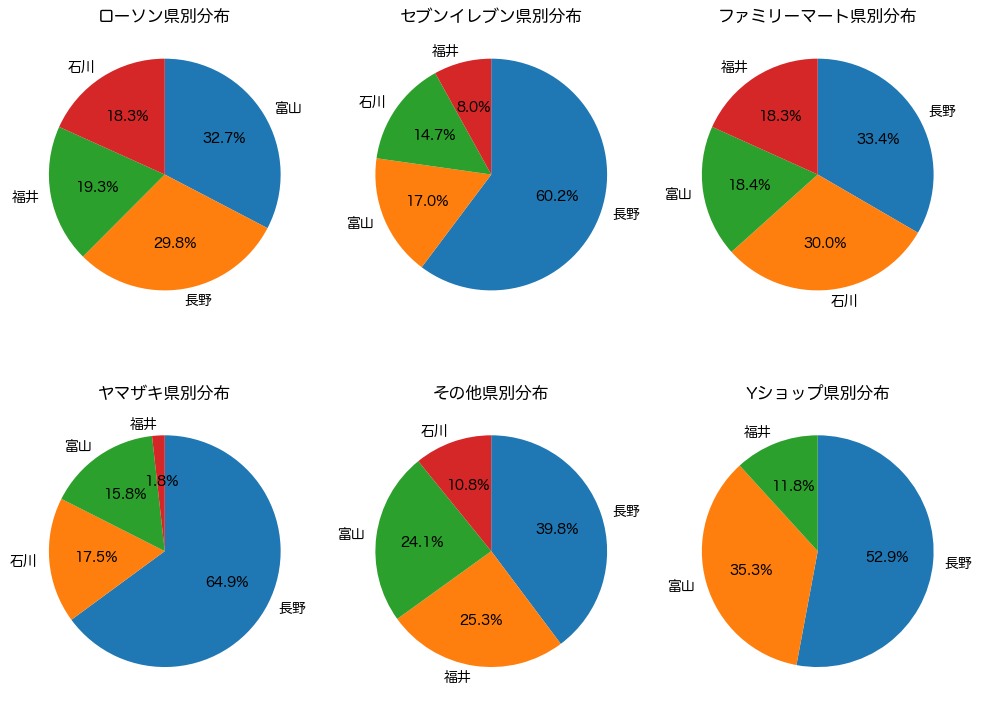

In [6]:
categories = df['店の種類'].unique()

colors_dict = {'石川': 'orange', '長野': 'blue', '富山': 'green', '福井': 'red'}

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, category in enumerate(categories):
    data_subset = df[df['店の種類'] == category]['県'].value_counts()
    sorted_data = dict(sorted(data_subset.items(), key=lambda item: item[1], reverse=True))
    
    axes[i].pie(sorted_data.values(), labels=sorted_data.keys(), autopct='%1.1f%%', startangle=90, counterclock=False)
    axes[i].set_title(f'{category}県別分布')
    
plt.tight_layout()
plt.show()

In [7]:
folium_map = folium.Map(location=[36.56528, 137.22194], zoom_start=8)

for i in range(len(df)):
    
    if 'セブンイレブン' in df.iloc[i]['店の種類']:
        color = 'red'
        radius = 1
    elif 'ファミリーマート' in df.iloc[i]['店の種類']:
        color = 'green'
        radius = 1
    elif 'ローソン' in df.iloc[i]['店の種類']:
        color = 'blue'
        radius = 1
    elif 'ヤマザキ' in df.iloc[i]['店の種類'] or 'Yショップ' in df.iloc[i]['店の種類']:
        color = 'yellow'
        radius = 1
    else:
        color = 'black'  
        radius = 0.5

    folium.CircleMarker(location=[df.iloc[i]['緯度'], df.iloc[i]['経度']], radius=radius, color=color).add_to(folium_map)

folium_map